# Data Exploration

This notebook explores patterns, relationships, and distributions in the AI Job Trends dataset.
The goal is to experiment with different visualizations and identify meaningful trends for the final infographic.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [9]:
AI_trends = pd.read_csv("ai_job_trends_dataset.csv")
AI_trends.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [25]:
AI_trends.columns


Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)'],
      dtype='object')

## Data Overview

The dataset covers projected AI-related job trends through the year 2030, providing a forward-looking view of employment patterns across industries. The variables include a mix of categorical features (such as industry and AI impact level) and numeric features (such as projected job openings). A review of the dataset shows that most variables are complete, with only minimal or no missing values present.


In [10]:
AI_trends.shape

(30000, 13)

In [11]:
AI_trends.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [12]:
AI_trends.describe(include="all")


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
count,30000,30000,30000,30000,30000.000000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000.000000
unique,639,8,2,3,NaN,5,NaN,NaN,NaN,NaN,NaN,8,NaN
top,"Surveyor, insurance",Entertainment,Increasing,Moderate,NaN,Bachelor’s Degree,NaN,NaN,NaN,NaN,NaN,Australia,NaN
freq,75,3895,15136,10042,NaN,6146,NaN,NaN,NaN,NaN,NaN,3802,NaN
mean,NaN,NaN,NaN,NaN,90119.965639,NaN,10.051433,5039.640833,5074.218100,49.836431,50.154229,NaN,49.979660
std,NaN,NaN,NaN,NaN,34412.013953,NaN,6.060678,2861.009654,2866.550722,28.966688,28.754889,NaN,17.274665
min,NaN,NaN,NaN,NaN,30001.860000,NaN,0.000000,100.000000,100.000000,0.000000,0.000000,NaN,20.000000
25%,NaN,NaN,NaN,NaN,60500.702500,NaN,5.000000,2570.000000,2586.750000,24.570000,25.400000,NaN,35.070000
50%,NaN,NaN,NaN,NaN,90274.115000,NaN,10.000000,5034.000000,5106.500000,49.570000,50.020000,NaN,49.885000
75%,NaN,NaN,NaN,NaN,119454.710000,NaN,15.000000,7527.000000,7573.000000,75.100000,75.030000,NaN,64.910000


## Single-Variable Exploration

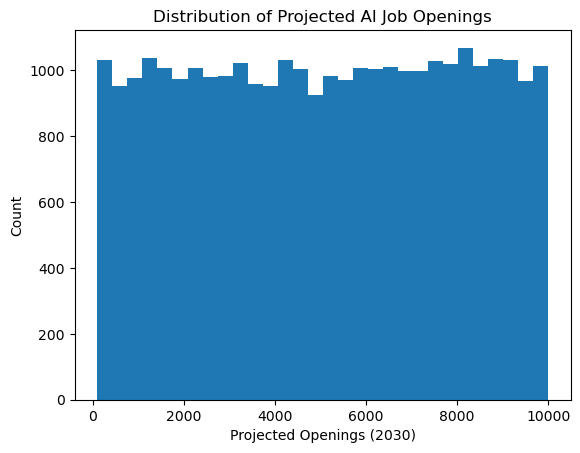

In [13]:
plt.hist(AI_trends["Projected Openings (2030)"], bins=30)
plt.xlabel("Projected Openings (2030)")
plt.ylabel("Count")
plt.title("Distribution of Projected AI Job Openings")
plt.show()

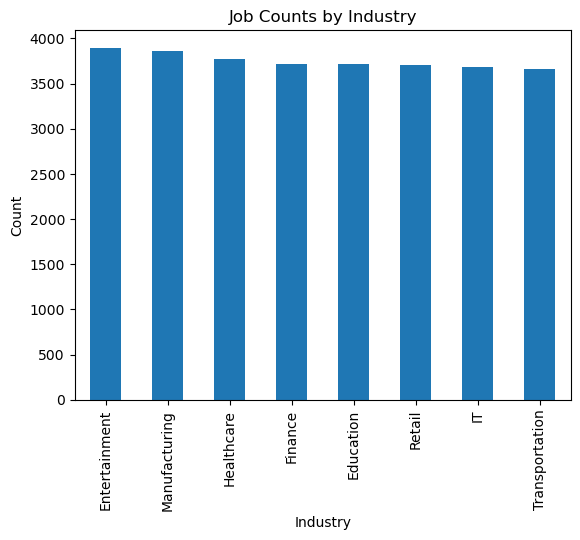

In [14]:
AI_trends["Industry"].value_counts().plot(kind="bar")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.title("Job Counts by Industry")
plt.show()

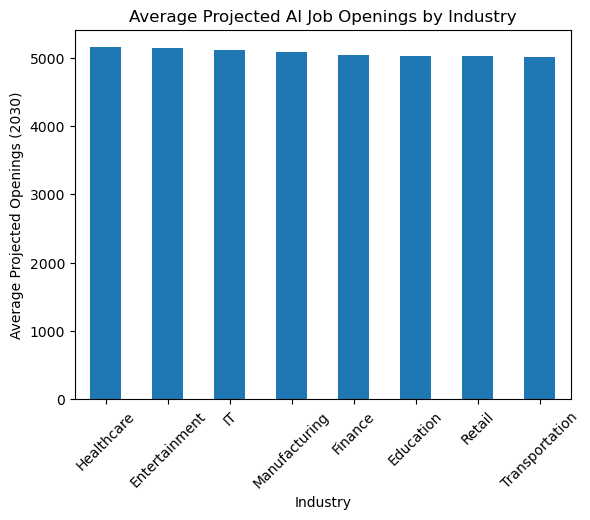

In [20]:
industry_avg = (
    AI_trends
    .groupby("Industry")["Projected Openings (2030)"]
    .mean()
    .sort_values(ascending=False)
)

industry_avg.plot(kind="bar")
plt.ylabel("Average Projected Openings (2030)")
plt.title("Average Projected AI Job Openings by Industry")
plt.xticks(rotation=45)
plt.show()


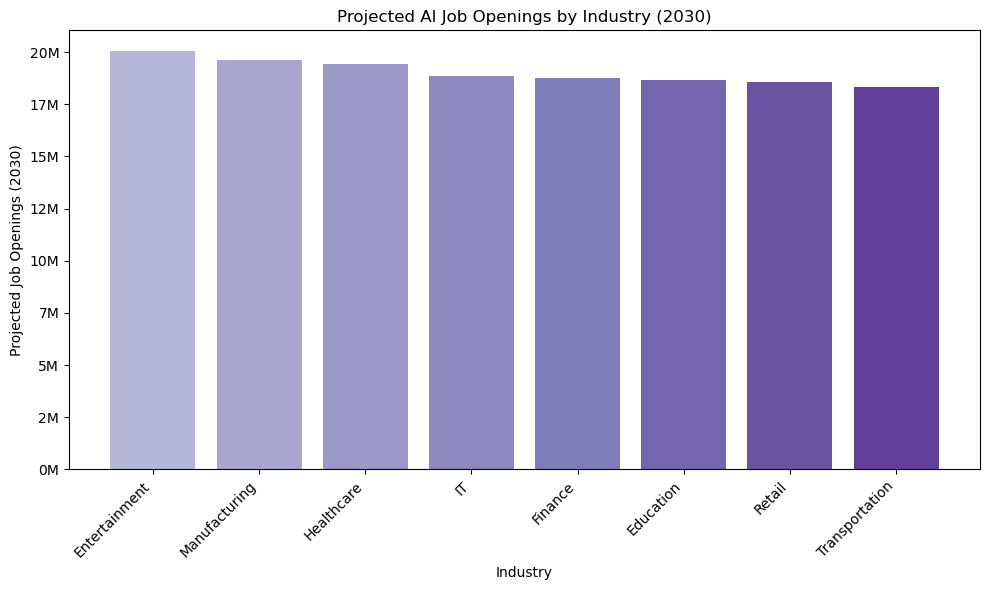

In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import numpy as np

industry_openings = (
    AI_trends
    .groupby("Industry")["Projected Openings (2030)"]
    .sum()
    .sort_values(ascending=False)
)

values = industry_openings.values
colors = cm.Purples(np.linspace(0.4, 0.8, len(values)))

plt.figure(figsize=(10, 6))
plt.bar(industry_openings.index, values, color=colors)

plt.xlabel("Industry")
plt.ylabel("Projected Job Openings (2030)")
plt.title("Projected AI Job Openings by Industry (2030)")
plt.xticks(rotation=45, ha="right")

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{int(x/1_000_000)}M")
)

plt.tight_layout()
plt.show()



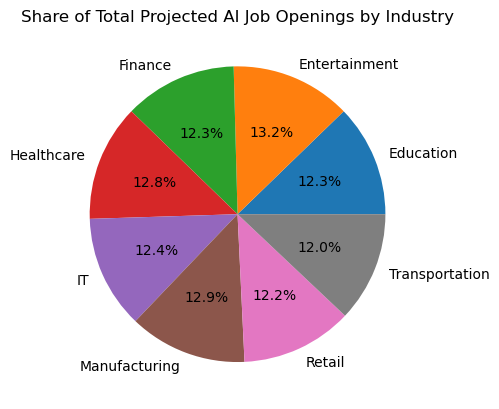

In [21]:
industry_share = (
    AI_trends
    .groupby("Industry")["Projected Openings (2030)"]
    .sum()
)

industry_share.plot(kind="pie", autopct="%1.1f%%")
plt.title("Share of Total Projected AI Job Openings by Industry")
plt.ylabel("")
plt.show()


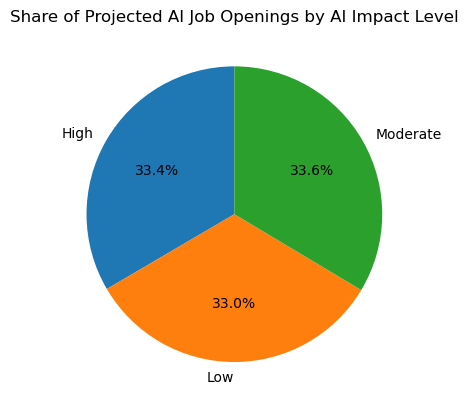

In [26]:
impact_share = (
    AI_trends
    .groupby("AI Impact Level")["Projected Openings (2030)"]
    .sum()
)

impact_share.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Share of Projected AI Job Openings by AI Impact Level")
plt.ylabel("")
plt.show()



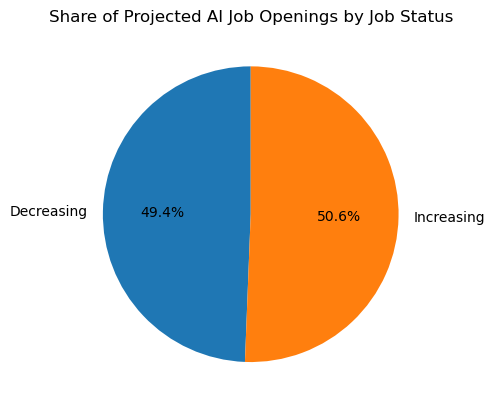

In [27]:
status_share = (
    AI_trends
    .groupby("Job Status")["Projected Openings (2030)"]
    .sum()
)

status_share.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Share of Projected AI Job Openings by Job Status")
plt.ylabel("")
plt.show()


/var/folders/jj/8mm9qtms4wzbxjsv2gnx1wt80000gn/T/ipykernel_3200/481545907.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Remote Category")["Projected Openings (2030)"]


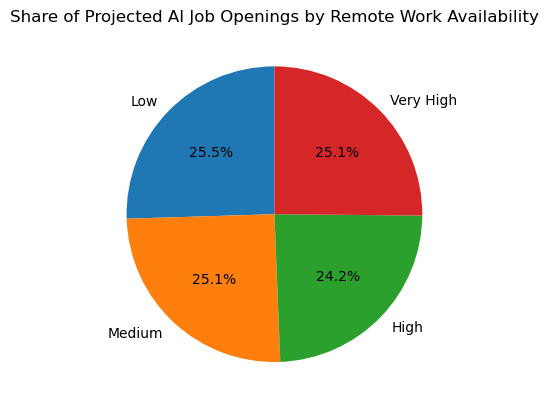

In [28]:
AI_trends["Remote Category"] = pd.cut(
    AI_trends["Remote Work Ratio (%)"],
    bins=[0, 25, 50, 75, 100],
    labels=["Low", "Medium", "High", "Very High"]
)

remote_share = (
    AI_trends
    .groupby("Remote Category")["Projected Openings (2030)"]
    .sum()
)

remote_share.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Share of Projected AI Job Openings by Remote Work Availability")
plt.ylabel("")
plt.show()


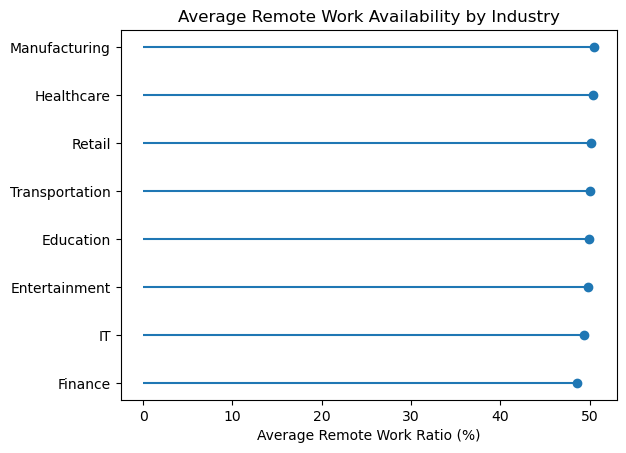

In [32]:
remote_avg = (
    AI_trends
    .groupby("Industry")["Remote Work Ratio (%)"]
    .mean()
    .sort_values()
)

plt.hlines(remote_avg.index, xmin=0, xmax=remote_avg.values)
plt.plot(remote_avg.values, remote_avg.index, "o")
plt.xlabel("Average Remote Work Ratio (%)")
plt.title("Average Remote Work Availability by Industry")
plt.show()


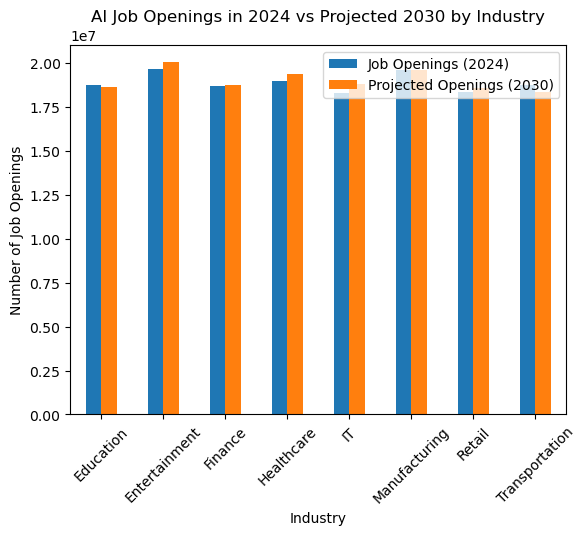

In [39]:
growth = (
    AI_trends
    .groupby("Industry")[["Job Openings (2024)", "Projected Openings (2030)"]]
    .sum()
)

growth.plot(kind="bar")
plt.ylabel("Number of Job Openings")
plt.title("AI Job Openings in 2024 vs Projected 2030 by Industry")
plt.xticks(rotation=45)
plt.show()


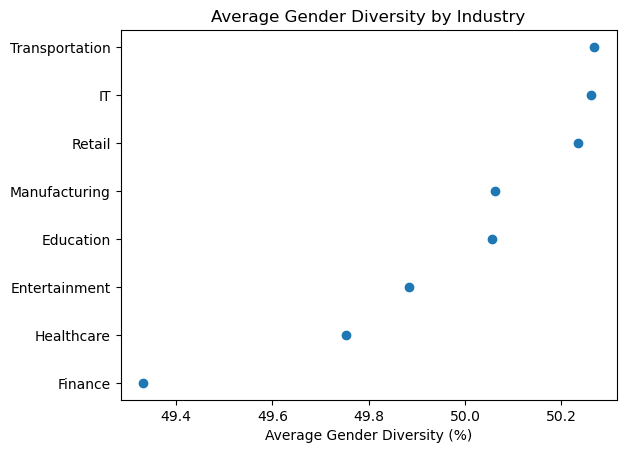

In [40]:
gender_avg = (
    AI_trends
    .groupby("Industry")["Gender Diversity (%)"]
    .mean()
    .sort_values()
)

plt.scatter(gender_avg.values, gender_avg.index)
plt.xlabel("Average Gender Diversity (%)")
plt.title("Average Gender Diversity by Industry")
plt.show()


## Initial Observations of the plots

Across both the distribution plot and the industry count plot, the data appear right-skewed, with a small number of categories accounting for a large share of projected AI job openings. The number of jobs is unevenly distributed across industries, indicating that AI-related growth is concentrated in certain sectors. A few categories show unusually high values compared to the rest, suggesting the presence of potential outliers.


## Multi-Variable Exploration

**Numeric vs categorical (boxplot or bar)**

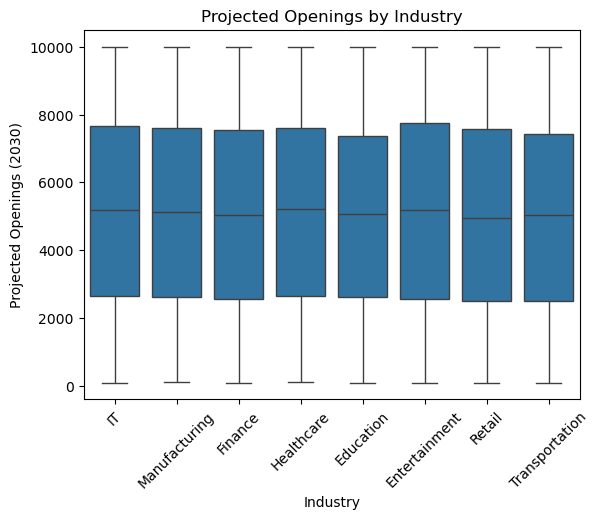

In [15]:
sns.boxplot(
    data=AI_trends,
    x="Industry",
    y="Projected Openings (2030)"
)
plt.xticks(rotation=45)
plt.title("Projected Openings by Industry")
plt.show()

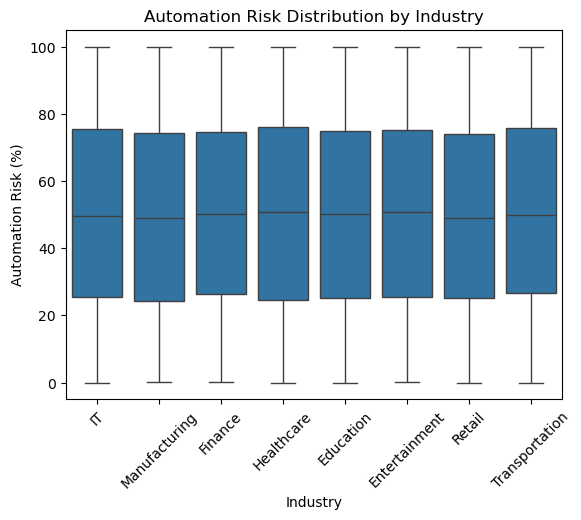

In [34]:
sns.boxplot(
    data=AI_trends,
    x="Industry",
    y="Automation Risk (%)"
)
plt.xticks(rotation=45)
plt.title("Automation Risk Distribution by Industry")
plt.show()


**Categorical vs categorical**

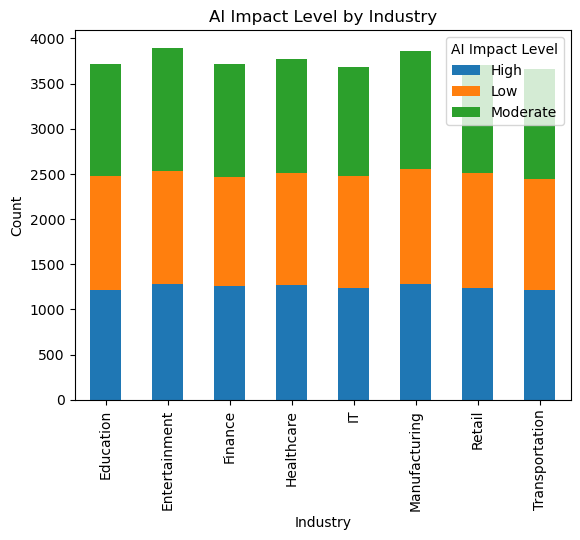

In [16]:
pd.crosstab(
    AI_trends["Industry"],
    AI_trends["AI Impact Level"]
).plot(kind="bar", stacked=True)
plt.title("AI Impact Level by Industry")
plt.ylabel("Count")
plt.show()

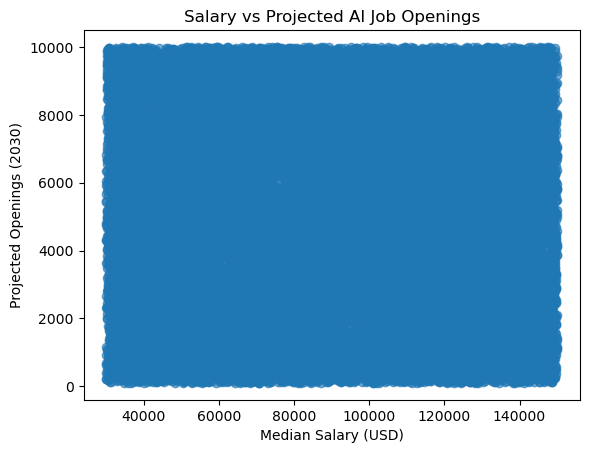

In [29]:
plt.scatter(
    AI_trends["Median Salary (USD)"],
    AI_trends["Projected Openings (2030)"],
    alpha=0.6
)
plt.xlabel("Median Salary (USD)")
plt.ylabel("Projected Openings (2030)")
plt.title("Salary vs Projected AI Job Openings")
plt.show()


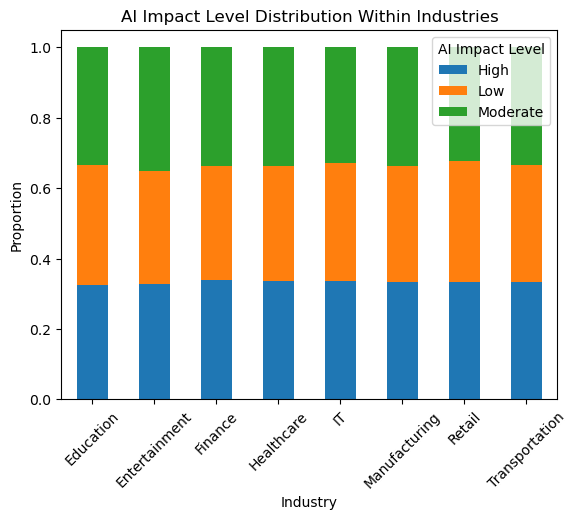

In [33]:
impact_norm = pd.crosstab(
    AI_trends["Industry"],
    AI_trends["AI Impact Level"],
    normalize="index"
)

impact_norm.plot(kind="bar", stacked=True)
plt.ylabel("Proportion")
plt.title("AI Impact Level Distribution Within Industries")
plt.xticks(rotation=45)
plt.show()


## Data Transformations

In [17]:
industry_summary = (
    AI_trends
    .groupby("Industry")["Projected Openings (2030)"]
    .mean()
    .sort_values(ascending=False)
)

industry_summary

Industry
Healthcare        5148.468046
Entertainment     5145.462901
IT                5115.900570
Manufacturing     5085.688197
Finance           5043.116904
Education         5022.835757
Retail            5017.846029
Transportation    5008.691068
Name: Projected Openings (2030), dtype: float64

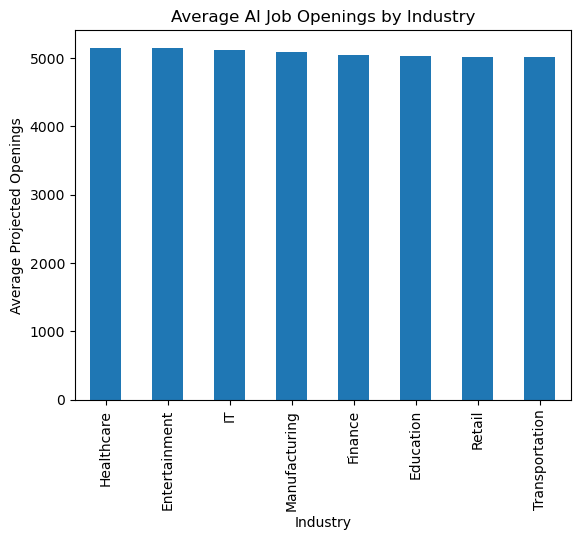

In [18]:
industry_summary.plot(kind="bar")
plt.ylabel("Average Projected Openings")
plt.title("Average AI Job Openings by Industry")
plt.show()


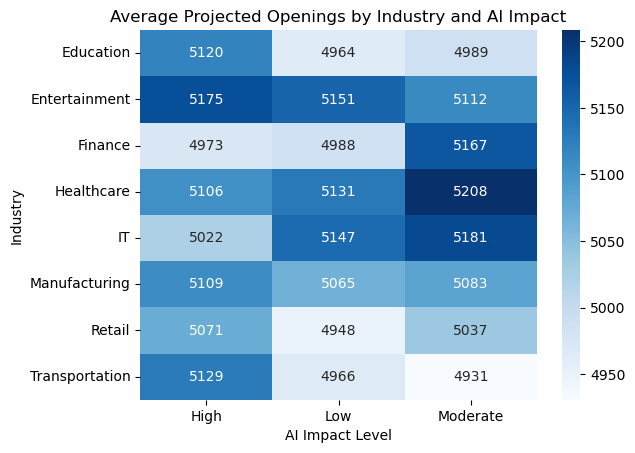

In [19]:
heatmap_data = pd.pivot_table(
    AI_trends,
    values="Projected Openings (2030)",
    index="Industry",
    columns="AI Impact Level",
    aggfunc="mean"
)

sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues")
plt.title("Average Projected Openings by Industry and AI Impact")
plt.show()


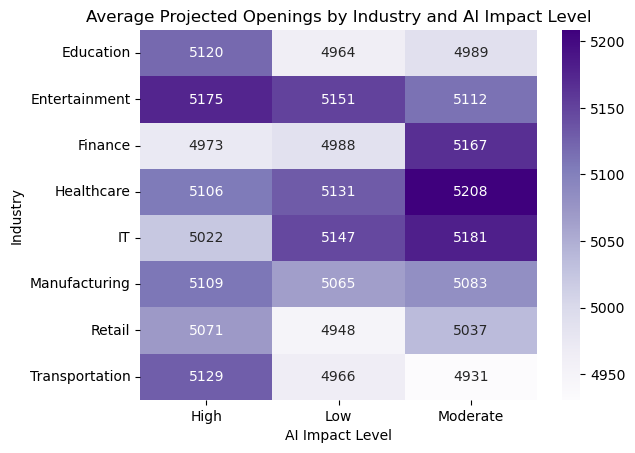

In [48]:
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="Purples"
)
plt.title("Average Projected Openings by Industry and AI Impact Level")
plt.show()


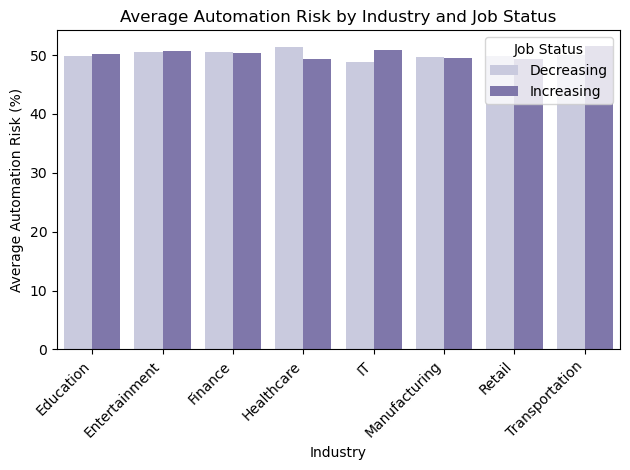

In [53]:
risk_long = risk_heatmap.reset_index().melt(
    id_vars="Industry",
    var_name="Job Status",
    value_name="Average Automation Risk (%)"
)

sns.barplot(
    data=risk_long,
    x="Industry",
    y="Average Automation Risk (%)",
    hue="Job Status",
    palette="Purples"
)
plt.xticks(rotation=45, ha="right")
plt.title("Average Automation Risk by Industry and Job Status")
plt.tight_layout()
plt.show()


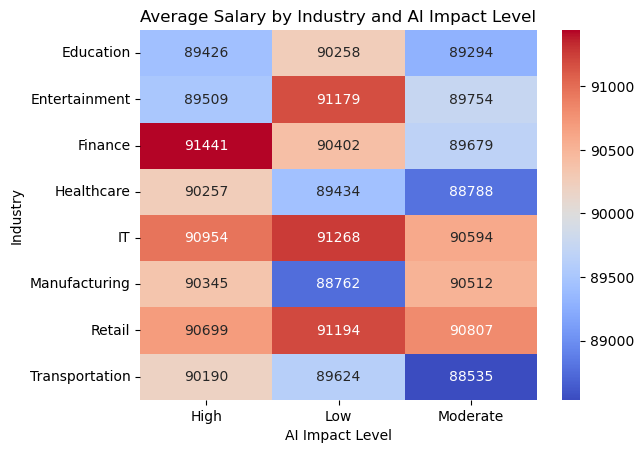

In [35]:
salary_heatmap = pd.pivot_table(
    AI_trends,
    values="Median Salary (USD)",
    index="Industry",
    columns="AI Impact Level",
    aggfunc="mean"
)

sns.heatmap(salary_heatmap, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Average Salary by Industry and AI Impact Level")
plt.show()


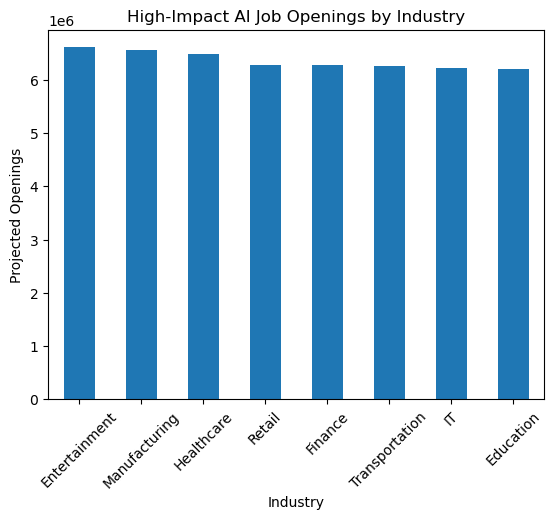

In [36]:
AI_trends[AI_trends["AI Impact Level"] == "High"].groupby(
    "Industry"
)["Projected Openings (2030)"].sum().sort_values(
    ascending=False
).plot(kind="bar")
plt.ylabel("Projected Openings")
plt.title("High-Impact AI Job Openings by Industry")
plt.xticks(rotation=45)
plt.show()


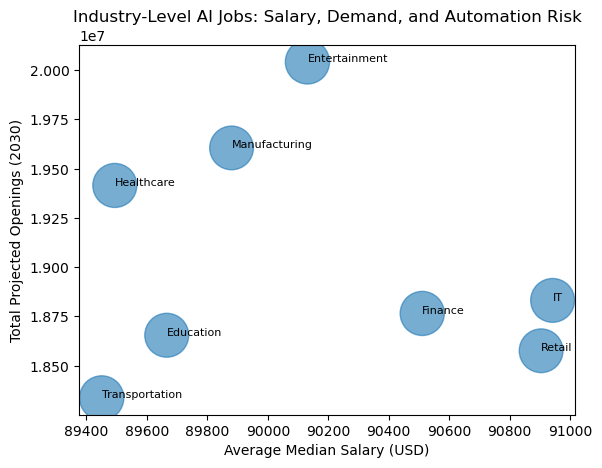

In [38]:
bubble_data = (
    AI_trends
    .groupby("Industry")
    .agg(
        avg_salary=("Median Salary (USD)", "mean"),
        total_openings=("Projected Openings (2030)", "sum"),
        avg_risk=("Automation Risk (%)", "mean")
    )
    .reset_index()
)

plt.scatter(
    bubble_data["avg_salary"],
    bubble_data["total_openings"],
    s=bubble_data["avg_risk"] * 20,
    alpha=0.6
)

for i, industry in enumerate(bubble_data["Industry"]):
    plt.text(
        bubble_data["avg_salary"][i],
        bubble_data["total_openings"][i],
        industry,
        fontsize=8
    )

plt.xlabel("Average Median Salary (USD)")
plt.ylabel("Total Projected Openings (2030)")
plt.title("Industry-Level AI Jobs: Salary, Demand, and Automation Risk")
plt.show()


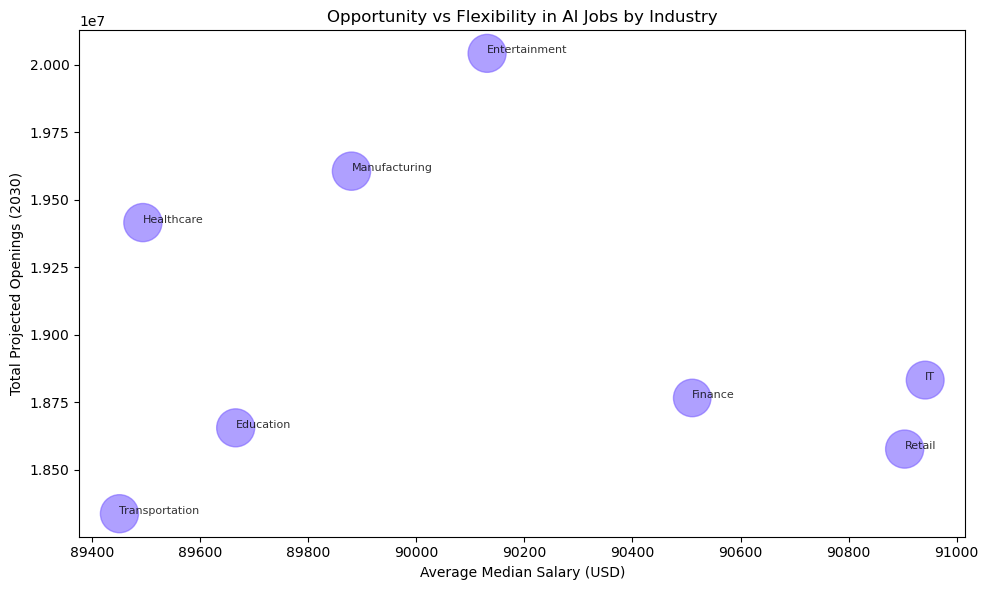

In [49]:
bubble_data = (
    AI_trends
    .groupby("Industry")
    .agg(
        avg_salary=("Median Salary (USD)", "mean"),
        total_openings=("Projected Openings (2030)", "sum"),
        avg_remote=("Remote Work Ratio (%)", "mean")
    )
    .reset_index()
)

plt.figure(figsize=(10, 6))

plt.scatter(
    bubble_data["avg_salary"],
    bubble_data["total_openings"],
    s=bubble_data["avg_remote"] * 15,
    color="#7B61FF",   # purple
    alpha=0.6
)

for i, industry in enumerate(bubble_data["Industry"]):
    plt.text(
        bubble_data["avg_salary"][i],
        bubble_data["total_openings"][i],
        industry,
        fontsize=8,
        alpha=0.8
    )

plt.xlabel("Average Median Salary (USD)")
plt.ylabel("Total Projected Openings (2030)")
plt.title("Opportunity vs Flexibility in AI Jobs by Industry")
plt.tight_layout()
plt.show()


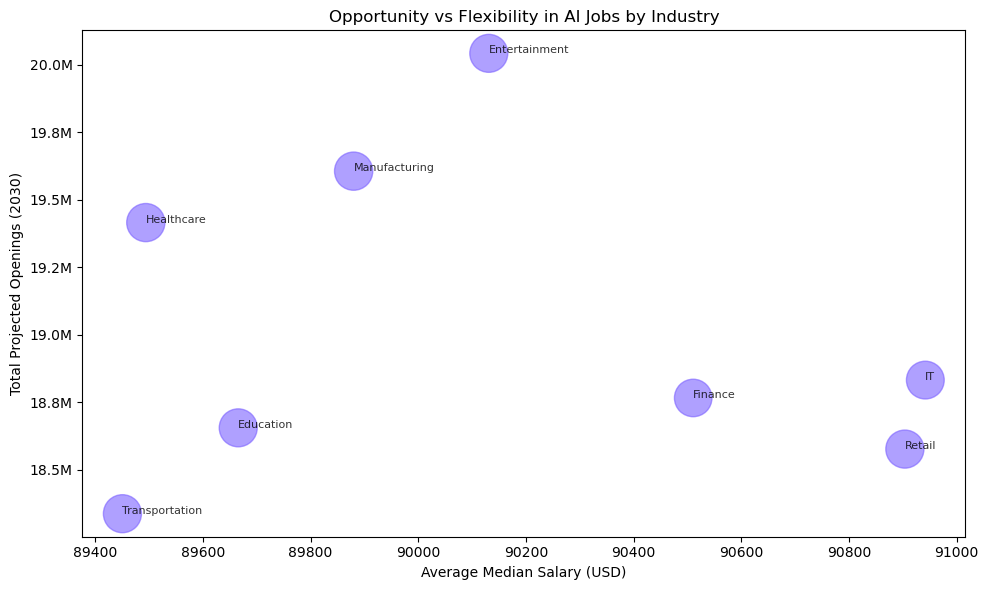

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

bubble_data = (
    AI_trends
    .groupby("Industry")
    .agg(
        avg_salary=("Median Salary (USD)", "mean"),
        total_openings=("Projected Openings (2030)", "sum"),
        avg_remote=("Remote Work Ratio (%)", "mean")
    )
    .reset_index()
)

plt.figure(figsize=(10, 6))

plt.scatter(
    bubble_data["avg_salary"],
    bubble_data["total_openings"],
    s=bubble_data["avg_remote"] * 15,
    color="#7B61FF",
    alpha=0.6
)

for i, industry in enumerate(bubble_data["Industry"]):
    plt.text(
        bubble_data["avg_salary"][i],
        bubble_data["total_openings"][i],
        industry,
        fontsize=8,
        alpha=0.8
    )

plt.xlabel("Average Median Salary (USD)")
plt.ylabel("Total Projected Openings (2030)")
plt.title("Opportunity vs Flexibility in AI Jobs by Industry")

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{x/1_000_000:.1f}M")
)

plt.tight_layout()
plt.show()


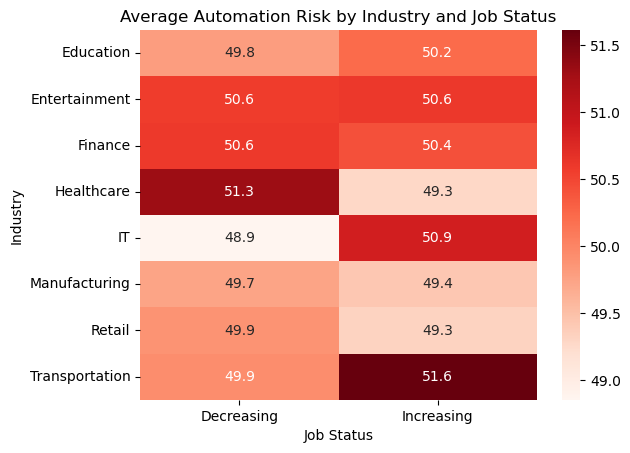

In [43]:
risk_heatmap = pd.pivot_table(
    AI_trends,
    values="Automation Risk (%)",
    index="Industry",
    columns="Job Status",
    aggfunc="mean"
)

sns.heatmap(risk_heatmap, annot=True, fmt=".1f", cmap="Reds")
plt.title("Average Automation Risk by Industry and Job Status")
plt.show()



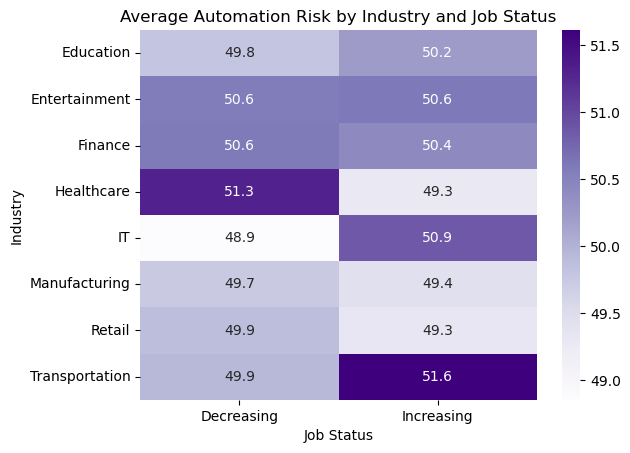

In [50]:
sns.heatmap(
    risk_heatmap,
    annot=True,
    fmt=".1f",
    cmap="Purples"
)
plt.title("Average Automation Risk by Industry and Job Status")
plt.show()


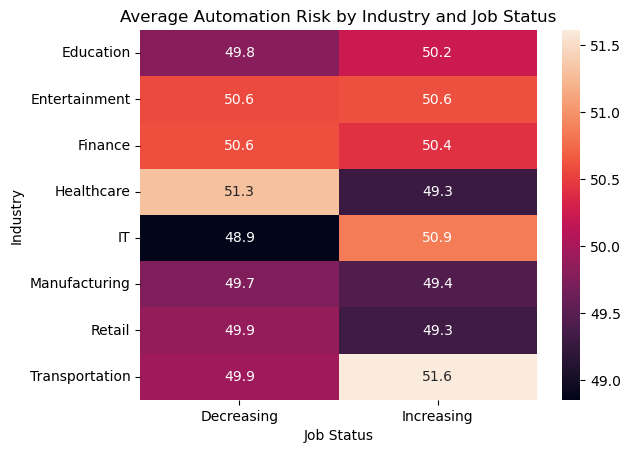

In [51]:
sns.heatmap(
    risk_heatmap,
    annot=True,
    fmt=".1f",
    cmap="rocket"   # deep purple/magenta tones
)
plt.title("Average Automation Risk by Industry and Job Status")
plt.show()


/var/folders/jj/8mm9qtms4wzbxjsv2gnx1wt80000gn/T/ipykernel_3200/4142095051.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AI_trends.groupby("Experience Bin")["Projected Openings (2030)"].sum().plot(


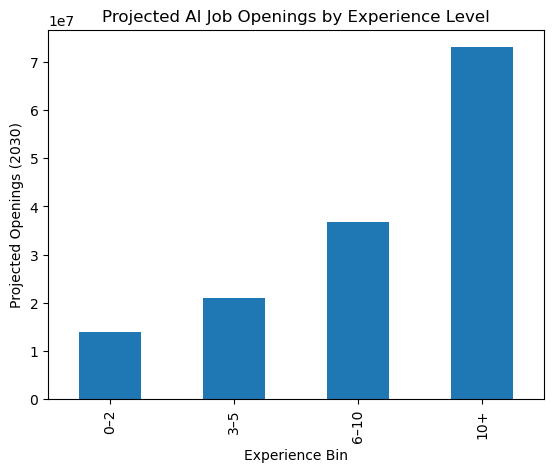

In [44]:
AI_trends["Experience Bin"] = pd.cut(
    AI_trends["Experience Required (Years)"],
    bins=[0, 2, 5, 10, 30],
    labels=["0–2", "3–5", "6–10", "10+"]
)

AI_trends.groupby("Experience Bin")["Projected Openings (2030)"].sum().plot(
    kind="bar"
)
plt.ylabel("Projected Openings (2030)")
plt.title("Projected AI Job Openings by Experience Level")
plt.show()


## Observation & Promising Directions

## Key Patterns and Promising Directions

- Projected AI job growth is not evenly distributed; a small number of industries account for a disproportionately large share of projected openings.
- Technology-adjacent industries (such as information technology and data-driven services) appear to be the most affected, with consistently higher projected job growth compared to other sectors.
- The strongest disparities appear across industries rather than within a single industry, highlighting uneven exposure to AI-driven change.
- Plots comparing projected openings by industry and visualizations showing AI impact levels across sectors are strong candidates for inclusion in the final infographic, as they clearly communicate concentration and disparity in AI job growth.
